### Read Data

We have training and test data for predict survival on the Titanic

In [1]:
import pandas as pd

test = pd.read_csv("test.csv")
test_shape = test.shape

train = pd.read_csv("train.csv")
train_shape = train.shape

In [2]:
print("test_shape",test_shape)
print("train_shape",train_shape)

test_shape (418, 11)
train_shape (891, 12)


Data dictionary:

**PassengerID** - A column added by Kaggle to identify each row and make submissions easier

**Survived**- Whether the passenger survived or not and the value we are predicting (0=No, 1=Yes)

**Pclass** - The class of the ticket the passenger purchased (1=1st, 2=2nd, 3=3rd)

**Sex** - The passenger's sex

**Age** - The passenger's age in years

**SibSp** - The number of siblings or spouses the passenger had aboard the Titanic

**Parch** - The number of parents or children the passenger had aboard the Titanic

**Ticket** - The passenger's ticket number

**Fare** - The fare the passenger paid

**Cabin** - The passenger's cabin number

**Embarked** - The port where the passenger embarked (C=Cherbourg, Q=Queenstown, S=Southampton)

In [3]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [4]:
test.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


The type of machine learning we will be doing is **binary classification**, because when we make predictions we are classifying each passenger as survived or not. There are only two different states we are classifying.

We start by exploring Sex and Pclass by visualizing the data.

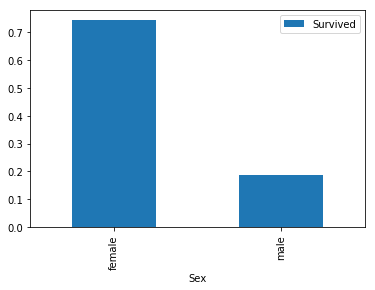

In [5]:
import matplotlib.pyplot as plt

sex_pivot = train.pivot_table(index="Sex",values="Survived")
sex_pivot.plot.bar()
plt.show()

We can see that females survived in much higher proportions than males did.

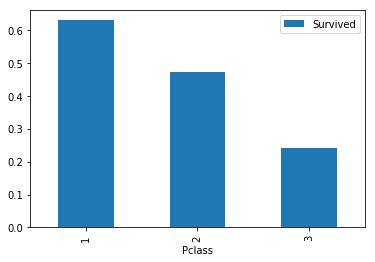

In [6]:
pclass_pivot = train.pivot_table(index="Pclass",values="Survived")
pclass_pivot.plot.bar()
plt.show()

We can see that 1st class ticket holders are survived more than other ticket holders

In [7]:
train["Age"].describe()

count    714.000000
mean      29.699118
std       14.526497
min        0.420000
25%       20.125000
50%       28.000000
75%       38.000000
max       80.000000
Name: Age, dtype: float64

The Age column contains numbers ranging from 0.42 to 80.0. The other thing to note here is that there are 714 values in this column, fewer than the 814 rows we discovered that the train data set had earlier in this mission which indicates we have some missing values.

One way to look at distribution of values in a continuous numerical set is to use histograms. We can create two histograms to compare visually the those that survived vs those who died across different age ranges

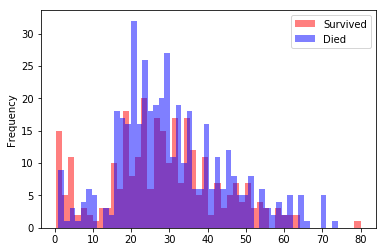

In [8]:
survived = train[train["Survived"] == 1]
died = train[train["Survived"] == 0]
survived["Age"].plot.hist(alpha=0.5,color='red',bins=50)
died["Age"].plot.hist(alpha=0.5,color='blue',bins=50)
plt.legend(['Survived','Died'])
plt.show()

We can see that in some age ranges more passengers survived - where the red bars are higher than the blue bars

In order for this to be useful to our machine learning model, we can separate this continuous feature into a categorical feature by dividing it into ranges.

Any change we make to the train data, we also need to make to the test data, otherwise we will be unable to use our model to make predictions for our submissions

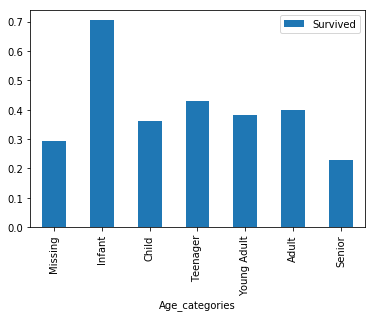

In [9]:
def process_age(df,cut_points,label_names):
    df["Age"] = df["Age"].fillna(-0.5)
    df["Age_categories"] = pd.cut(df["Age"],cut_points,labels=label_names)
    return df

cut_points = [-1,0,5,12,18,35,60,100]
label_names = ["Missing","Infant","Child","Teenager","Young Adult","Adult","Senior"]

train = process_age(train,cut_points,label_names)
test = process_age(test,cut_points,label_names)

age_categories_pivot = train.pivot_table(index="Age_categories",values="Survived")
age_categories_pivot.plot.bar()
plt.show()

While the class of each passenger certainly has some sort of ordered relationship, the relationship between each class is not the same as the relationship between the numbers 1, 2, and 3. For instance, class 2 isn't "worth" double what class 1 is, and class 3 isn't "worth" triple what class 1 is.

In order to remove this relationship, we can create dummy columns for each unique value in Pclass

In [10]:
def create_dummies(df,column_name):
    dummies = pd.get_dummies(df[column_name],prefix=column_name)
    df = pd.concat([df,dummies],axis=1)
    return df

train = create_dummies(train,"Pclass")
test = create_dummies(test,"Pclass")

train = create_dummies(train,"Sex")
test = create_dummies(test,"Sex")

train = create_dummies(train,"Age_categories")
test = create_dummies(test,"Age_categories")

train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,...,Pclass_3,Sex_female,Sex_male,Age_categories_Missing,Age_categories_Infant,Age_categories_Child,Age_categories_Teenager,Age_categories_Young Adult,Age_categories_Adult,Age_categories_Senior
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,...,1,0,1,0,0,0,0,1,0,0
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,...,0,1,0,0,0,0,0,0,1,0
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,...,1,1,0,0,0,0,0,1,0,0
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,...,0,1,0,0,0,0,0,1,0,0
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,...,1,0,1,0,0,0,0,1,0,0


We are ready to train our first model. The first model we will use is called Logistic Regression

In [11]:
columns = ['Pclass_1', 'Pclass_2', 'Pclass_3', 'Sex_female', 'Sex_male',
       'Age_categories_Missing','Age_categories_Infant',
       'Age_categories_Child', 'Age_categories_Teenager',
       'Age_categories_Young Adult', 'Age_categories_Adult',
       'Age_categories_Senior']

from sklearn.linear_model import LogisticRegression

lr = LogisticRegression()
lr.fit(train[columns],train["Survived"])

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

We can fit and predict on our train dataframe, however if we do this there is a high likelihood that our model will overfit, which means it will perform well because we're testing on the same data we've trained on, but then perform much worse on new, unseen data.

Instead we can split our train dataframe into two:

One part to train our model on (often 80% of the observations)

One part to make predictions with and test our model (often 20% of the observations)

The convention in machine learning is to call these two parts train and test. This can become confusing, since we already have our test dataframe. To avoid confusion, from here on, we're going to call this 'test' data holdout data, which is the technical name given to this type of data used for final predictions.

In [12]:
holdout = test # from now on we will refer to this
               # dataframe as the holdout data

from sklearn.model_selection import train_test_split

columns = ['Pclass_1', 'Pclass_2', 'Pclass_3', 'Sex_female', 'Sex_male',
       'Age_categories_Missing','Age_categories_Infant',
       'Age_categories_Child', 'Age_categories_Teenager',
       'Age_categories_Young Adult', 'Age_categories_Adult',
       'Age_categories_Senior']

all_X = train[columns]
all_y = train['Survived']

train_X, test_X, train_y, test_y = train_test_split(
    all_X, all_y, test_size=0.2,random_state=0)


We have our data split into train and test sets, we can fit our model again on our training set, and then use that model to make predictions on our test set.



In [13]:
from sklearn.metrics import accuracy_score

lr = LogisticRegression()
lr.fit(train_X, train_y)
predictions = lr.predict(test_X)
accuracy = accuracy_score(test_y, predictions)

accuracy

0.81005586592178769

Our model has an accuracy score of 81.0% when tested against our 20% test set. Given that this data set is quite small, there is a good chance that our model is overfitting, and will not perform as well on totally unseen data.

To give us a better understanding of the real performance of our model, we use a technique called cross validation to train and test our model on different splits of our data, and then average the accuracy scores.

We use k-fold cross validation.

In [14]:
from sklearn.model_selection import cross_val_score
import numpy as np

lr = LogisticRegression()
scores = cross_val_score(lr,all_X,all_y,cv=10)
accuracy = np.mean(scores)
print(scores)
print(accuracy)

[ 0.8         0.81111111  0.7752809   0.87640449  0.80898876  0.78651685
  0.76404494  0.76404494  0.83146067  0.80681818]
0.802467086596


From the results of our k-fold validation, We see that the accuracy number varies with each fold - ranging between 76.4% and 87.6%.

We use the model we have built to train our final model and then make predictions on our unseen holdout data.

In [15]:
columns = ['Pclass_1', 'Pclass_2', 'Pclass_3', 'Sex_female', 'Sex_male',
       'Age_categories_Missing','Age_categories_Infant',
       'Age_categories_Child', 'Age_categories_Teenager',
       'Age_categories_Young Adult', 'Age_categories_Adult',
       'Age_categories_Senior']

lr = LogisticRegression()
lr.fit(all_X, all_y)
holdout_predictions= lr.predict(holdout[columns])

We need to create a submission file

In [16]:
holdout_ids = holdout["PassengerId"]
submission_df = {"PassengerId": holdout_ids,
                 "Survived": holdout_predictions}
submission = pd.DataFrame(submission_df)

submission.to_csv("submission.csv",index=False)

Our first submission has 0.75598 accuracy score.


In [17]:
train.shape #training dataset

(891, 25)

In [18]:
holdout.shape #test dataset

(418, 24)

 There are two main areas we can focus on to boost the accuracy of our predictions:

* Improving the features we train our model on

* Improving the model itself

we're going to focus working with the features used in our model.

We'll start by looking at feature selection. Feature selection is important because it helps to exclude features which are not good predictors, or features that are closely related to each other. Both of these will cause our model to be less accurate, particularly on previously unseen data.

Our model was based on three columns from the original data: Age, Sex, and Pclass. There are a number of other columns that we haven't yet used.

We can ignore PassengerId, since this is just a column Kaggle have added to identify each passenger and calculate scores. We can also ignore Survived, as this is what we're predicting, as well as the three columns we've already used.

Both the Name and Ticket columns unique to each passenger.

We use the Dataframe.describe() method to give us some more information on the values within each remaining column.

In [19]:
columns = ['SibSp','Parch','Fare','Cabin','Embarked']
train[columns].describe(include='all',percentiles=[])

,SibSp,Parch,Fare,Cabin,Embarked
count,891.000000,891.000000,891.000000,204,889
unique,NaN,NaN,NaN,147,3
top,NaN,NaN,NaN,G6,S
freq,NaN,NaN,NaN,4,644
mean,0.523008,0.381594,32.204208,NaN,NaN
std,1.102743,0.806057,49.693429,NaN,NaN
min,0.000000,0.000000,0.000000,NaN,NaN
50%,0.000000,0.000000,14.454200,NaN,NaN
max,8.000000,6.000000,512.329200,NaN,NaN


Of these, SibSp, Parch and Fare look to be standard numeric columns with no missing values. Cabin has values for only 204 of the 891 rows, and even then most of the values are unique, so for now we will leave this column also. Embarked looks to be a standard categorical column with 3 unique values, much like PClass was, except that there are two missing values. We can easily fill these two missing values with the most common value, "S" which occurs 644 times.

Looking at our numeric columns, we can see a big difference between the range of each. SibSp has values between 0-8, Parch between 0-6, and Fare is on a dramatically different scale, with values ranging from 0-512. In order to make sure these values are equally weighted within our model, we'll need to rescale the data.

We process the Embarked, SibSp, Parch and Fare columns in both our train and holdout dataframes.

In [20]:
from sklearn.preprocessing import minmax_scale
# The holdout set has a missing value in the Fare column which
# we'll fill with the mean.
holdout["Fare"] = holdout["Fare"].fillna(train["Fare"].mean())
columns = ["SibSp","Parch","Fare"]

train["Embarked"] = train["Embarked"].fillna("S")
holdout["Embarked"] = holdout["Embarked"].fillna("S")

train = create_dummies(train,"Embarked")
holdout = create_dummies(holdout,"Embarked")

for col in columns:
    train[col + "_scaled"] = minmax_scale(train[col])
    holdout[col + "_scaled"] = minmax_scale(holdout[col])

C:\Users\YUNUS-NB\Anaconda3\lib\site-packages\sklearn\utils\validation.py:444: DataConversionWarning: Data with input dtype int64 was converted to float64.
  warnings.warn(msg, DataConversionWarning)


In [21]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,...,Age_categories_Teenager,Age_categories_Young Adult,Age_categories_Adult,Age_categories_Senior,Embarked_C,Embarked_Q,Embarked_S,SibSp_scaled,Parch_scaled,Fare_scaled
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,...,0,1,0,0,0,0,1,0.125,0.0,0.014151
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,...,0,0,1,0,1,0,0,0.125,0.0,0.139136
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,...,0,1,0,0,0,0,1,0.000,0.0,0.015469
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,...,0,1,0,0,0,0,1,0.125,0.0,0.103644
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,...,0,1,0,0,0,0,1,0.000,0.0,0.015713


We'll now fit a model and plot the coefficients for each feature.

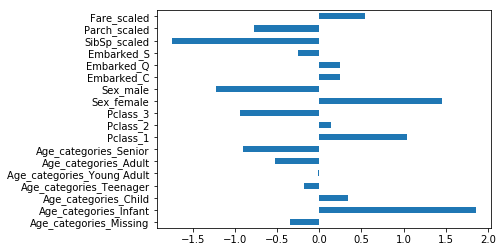

In [22]:
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression

columns = ['Age_categories_Missing', 'Age_categories_Infant',
       'Age_categories_Child', 'Age_categories_Teenager',
       'Age_categories_Young Adult', 'Age_categories_Adult',
       'Age_categories_Senior', 'Pclass_1', 'Pclass_2', 'Pclass_3',
       'Sex_female', 'Sex_male', 'Embarked_C', 'Embarked_Q', 'Embarked_S',
       'SibSp_scaled', 'Parch_scaled', 'Fare_scaled']

lr = LogisticRegression()

lr.fit(train[columns],train["Survived"])

coefficients = lr.coef_

feature_importance = pd.Series(coefficients[0],
                               index=train[columns].columns)

feature_importance.plot.barh()
plt.show()

The plot showed a range of both positive and negative values. Whether the value is positive or negative isn't as important in this case, relative to the magnitude of the value. A feature that indicates strongly whether a passenger died is just as useful as a feature that indicates strongly that a passenger survived, given they are mutually exclusive outcomes.

To make things easier to interpret, we'll alter the plot to show all positive values, and have sorted the bars in order of size

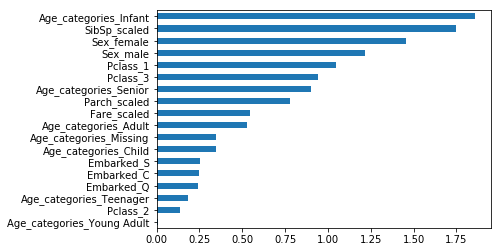

In [23]:
ordered_feature_importance = feature_importance.abs().sort_values()
ordered_feature_importance.plot.barh()
plt.show()

We'll train a new model with the top 8 scores and check our accuracy using cross validation.

In [24]:
from sklearn.model_selection import cross_val_score
import numpy as np
columns = ['Age_categories_Infant', 'SibSp_scaled', 'Sex_female', 'Sex_male',
       'Pclass_1', 'Pclass_3', 'Age_categories_Senior', 'Parch_scaled']

lr = LogisticRegression()
scores = cross_val_score(lr,train[columns],train["Survived"],cv=10)
accuracy = np.mean(scores)

print(scores)
print(accuracy)

[ 0.82222222  0.82222222  0.79775281  0.86516854  0.83146067  0.78651685
  0.79775281  0.76404494  0.84269663  0.81818182]
0.814801952105


The cross validation score of 81.48% is marginally higher than the cross validation score for the model we created before, which had a score of 80.2%.

train a model using the columns, make some predictions on the holdout data

In [25]:
columns = ['Age_categories_Infant', 'SibSp_scaled', 'Sex_female', 'Sex_male',
       'Pclass_1', 'Pclass_3', 'Age_categories_Senior', 'Parch_scaled']

all_X = train[columns]
all_y = train['Survived']

lr = LogisticRegression()
lr.fit(all_X, all_y)
holdout_predictions= lr.predict(holdout[columns])

holdout_ids = holdout["PassengerId"]
submission_df = {"PassengerId": holdout_ids,
                 "Survived": holdout_predictions}
submission = pd.DataFrame(submission_df)

submission.to_csv("submission_1.csv",index=False)

Our second submission has 0.77033 accuracy score.

One common way to engineer a feature is using a technique called binning. Binning is when you take a continuous feature, like the fare a passenger paid for their ticket, and separate it out into several ranges (or 'bins'), turning it into a categorical variable.

In [26]:
def process_fare(df,cut_points,label_names):
    df["Fare_categories"] = pd.cut(df["Fare"],cut_points,labels=label_names)
    return df

def create_dummies(df,column_name):
    dummies = pd.get_dummies(df[column_name],prefix=column_name)
    df = pd.concat([df,dummies],axis=1)
    return df

cut_points = [0,12,50,100,1000]
label_names = ["0-12","12-50","50-100","100+"]

train = process_fare(train,cut_points,label_names)
holdout = process_fare(holdout,cut_points,label_names)

train = create_dummies(train,"Fare_categories")
holdout = create_dummies(holdout,"Fare_categories")

Another way to engineer features is by extracting data from text columns. 

Cabin numbers are one letter followed by two numbers. It seems like the letter is representative of the type of cabin, which could be useful data for us.

Looking at the Name column, There is a title like 'Mr' or 'Mrs' within each, as well as some less common titles, like the 'Countess'. We can categorize different titles into six types:

**Mr,Mrs,Master,Miss,Officer,Royalty**




In [27]:
titles = {
    "Mr" :         "Mr",
    "Mme":         "Mrs",
    "Ms":          "Mrs",
    "Mrs" :        "Mrs",
    "Master" :     "Master",
    "Mlle":        "Miss",
    "Miss" :       "Miss",
    "Capt":        "Officer",
    "Col":         "Officer",
    "Major":       "Officer",
    "Dr":          "Officer",
    "Rev":         "Officer",
    "Jonkheer":    "Royalty",
    "Don":         "Royalty",
    "Sir" :        "Royalty",
    "Countess":    "Royalty",
    "Dona":        "Royalty",
    "Lady" :       "Royalty"
}

extracted_titles = train["Name"].str.extract(' ([A-Za-z]+)\.',expand=False)
train["Title"] = extracted_titles.map(titles)
extracted_titles = holdout["Name"].str.extract(' ([A-Za-z]+)\.',expand=False)
holdout["Title"] = extracted_titles.map(titles)

train["Cabin_type"] = train["Cabin"].str[0]
train["Cabin_type"] = train["Cabin_type"].fillna("Unknown")

holdout["Cabin_type"] = holdout["Cabin"].str[0]
holdout["Cabin_type"] = train["Cabin_type"].fillna("Unknown")

for column in ["Title","Cabin_type"]:
    train = create_dummies(train,column)
    holdout = create_dummies(holdout,column)

We now have 34 possible feature columns we can use to train our model. When we add more features , Collinearity occurs where more than one feature contains data that are similar. The effect of collinearity is that our model will overfit.

Way to spot collinearity is to plot correlations between each pair of variables in a heatmap.



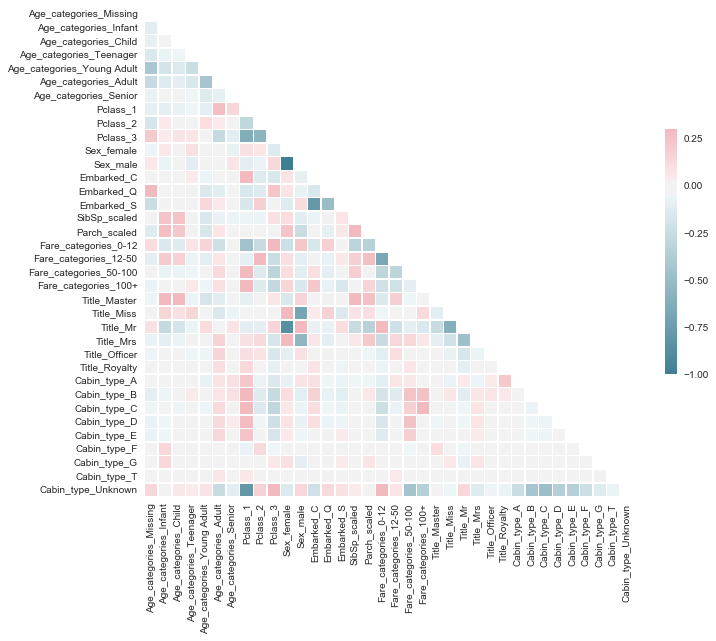

In [28]:
import numpy as np
import seaborn as sns

def plot_correlation_heatmap(df):
    corr = df.corr()
    
    sns.set(style="white")
    mask = np.zeros_like(corr, dtype=np.bool)
    mask[np.triu_indices_from(mask)] = True

    f, ax = plt.subplots(figsize=(11, 9))
    cmap = sns.diverging_palette(220, 10, as_cmap=True)


    sns.heatmap(corr, mask=mask, cmap=cmap, vmax=.3, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})
    plt.show()

columns = ['Age_categories_Missing', 'Age_categories_Infant',
       'Age_categories_Child', 'Age_categories_Teenager',
       'Age_categories_Young Adult', 'Age_categories_Adult',
       'Age_categories_Senior', 'Pclass_1', 'Pclass_2', 'Pclass_3',
       'Sex_female', 'Sex_male', 'Embarked_C', 'Embarked_Q', 'Embarked_S',
       'SibSp_scaled', 'Parch_scaled', 'Fare_categories_0-12',
       'Fare_categories_12-50','Fare_categories_50-100', 'Fare_categories_100+',
       'Title_Master', 'Title_Miss', 'Title_Mr','Title_Mrs', 'Title_Officer',
       'Title_Royalty', 'Cabin_type_A','Cabin_type_B', 'Cabin_type_C', 'Cabin_type_D',
       'Cabin_type_E','Cabin_type_F', 'Cabin_type_G', 'Cabin_type_T', 'Cabin_type_Unknown']

plot_correlation_heatmap(train[columns])

We can see that there is a high correlation between **Sex_female/Sex_male** and **Title_Miss/Title_Mr/Title_Mrs**. We will remove the columns Sex_female and Sex_male since the title data may be more nuanced.

Apart from that, we should remove one of each of our dummy variables to reduce the collinearity in each. We'll remove:

**Pclass_2,Age_categories_Teenager,Fare_categories_12-50,Title_Master,Cabin_type_A**

We use recursive feature elimination with cross-validation(RFECV) to select the most relevant features.

* The RFECV class starts by training a model using all of your features and scores it using cross validation. It then uses the logit coefficients to eliminate the least important feature, and trains and scores a new model. At the end, the class looks at all the scores, and selects the set of features which scored highest.



In [29]:
from sklearn.feature_selection import RFECV

columns = ['Age_categories_Missing', 'Age_categories_Infant',
       'Age_categories_Child', 'Age_categories_Young Adult',
       'Age_categories_Adult', 'Age_categories_Senior', 'Pclass_1', 'Pclass_3',
       'Embarked_C', 'Embarked_Q', 'Embarked_S', 'SibSp_scaled',
       'Parch_scaled', 'Fare_categories_0-12', 'Fare_categories_50-100',
       'Fare_categories_100+', 'Title_Miss', 'Title_Mr', 'Title_Mrs',
       'Title_Officer', 'Title_Royalty', 'Cabin_type_B', 'Cabin_type_C',
       'Cabin_type_D', 'Cabin_type_E', 'Cabin_type_F', 'Cabin_type_G',
       'Cabin_type_T', 'Cabin_type_Unknown']

all_X = train[columns]
all_y = train["Survived"]

lr = LogisticRegression()

selector = RFECV(lr,cv=10)

selector.fit(all_X,all_y)

optimized_columns = all_X.columns[selector.support_]

optimized_columns

Index(['SibSp_scaled', 'Title_Mr', 'Title_Officer', 'Cabin_type_Unknown'], dtype='object')

 train a model using cross validation using these columns 

In [30]:
all_X = train[optimized_columns]
all_y = train["Survived"]

lr = LogisticRegression()
scores = cross_val_score(lr,all_X,all_y,cv=10)
accuracy = np.mean(scores)

print(scores)
print(accuracy)

[ 0.83333333  0.83333333  0.7752809   0.87640449  0.83146067  0.80898876
  0.80898876  0.78651685  0.84269663  0.82954545]
0.822654919986


This four-feature model scores 82.3%, a modest improvement compared to the 81.5% from our earlier model.train these columns on the holdout set, save a submission file

In [31]:
columns = ['SibSp_scaled', 'Title_Mr', 'Title_Officer', 'Cabin_type_Unknown']

lr = LogisticRegression()
lr.fit(all_X, all_y)
holdout_predictions= lr.predict(holdout[columns])

holdout_ids = holdout["PassengerId"]
submission_df = {"PassengerId": holdout_ids,
                 "Survived": holdout_predictions}
submission = pd.DataFrame(submission_df)

submission.to_csv("submission_2.csv",index=False)

Our third submission has 0.77990 accuracy score

we'll work with two other algorithms: k-nearest neighbors and random forests.

In [39]:
col = ['Survived', 'PassengerId', 'Age_categories_Missing',
       'Age_categories_Infant', 'Age_categories_Child',
       'Age_categories_Teenager', 'Age_categories_Young Adult',
       'Age_categories_Adult', 'Age_categories_Senior', 'Pclass_1', 'Pclass_2',
       'Pclass_3', 'Sex_female', 'Sex_male', 'Embarked_C', 'Embarked_Q',
       'Embarked_S', 'SibSp_scaled', 'Parch_scaled', 'Fare_scaled',
       'Fare_categories_0-12', 'Fare_categories_12-50',
       'Fare_categories_50-100', 'Fare_categories_100+', 'Title_Master',
       'Title_Miss', 'Title_Mr', 'Title_Mrs', 'Title_Officer', 'Title_Royalty',
       'Cabin_type_A', 'Cabin_type_B', 'Cabin_type_C', 'Cabin_type_D',
       'Cabin_type_E', 'Cabin_type_F', 'Cabin_type_G', 'Cabin_type_T',
       'Cabin_type_Unknown']

train2 = train[col]
train2.shape

(891, 39)

In [42]:
col2 = [ 'PassengerId', 'Age_categories_Missing',
       'Age_categories_Infant', 'Age_categories_Child',
       'Age_categories_Teenager', 'Age_categories_Young Adult',
       'Age_categories_Adult', 'Age_categories_Senior', 'Pclass_1', 'Pclass_2',
       'Pclass_3', 'Sex_female', 'Sex_male', 'Embarked_C', 'Embarked_Q',
       'Embarked_S', 'SibSp_scaled', 'Parch_scaled', 'Fare_scaled',
       'Fare_categories_0-12', 'Fare_categories_12-50',
       'Fare_categories_50-100', 'Fare_categories_100+', 'Title_Master',
       'Title_Miss', 'Title_Mr', 'Title_Mrs', 'Title_Officer', 'Title_Royalty',
       'Cabin_type_A', 'Cabin_type_B', 'Cabin_type_C', 'Cabin_type_D',
       'Cabin_type_E', 'Cabin_type_F', 'Cabin_type_G', 'Cabin_type_T',
       'Cabin_type_Unknown']
holdout2 = holdout[col2]
holdout2.shape

(418, 38)

We train a logistic regression model and We'll use cross validation to get a baseline score.

In [47]:
all_X = train2.drop(['Survived','PassengerId'],axis=1)
all_y = train2['Survived']

lr = LogisticRegression()
scores = cross_val_score(lr,all_X,all_y,cv=10)
accuracy_lr = np.mean(scores)

print(scores)
print(accuracy_lr)

[ 0.76666667  0.82222222  0.78651685  0.87640449  0.83146067  0.80898876
  0.82022472  0.82022472  0.85393258  0.85227273]
0.823891442515


The k-nearest neighbors algorithm finds the observations in our training set most similar to the observation in our test set, and uses the average outcome of those 'neighbor' observations to make a prediction. The 'k' is the number of neighbor observations used to make the prediction.

Scikit-learn's use of object-oriented design makes it easy to substitute one model for another. The syntax to instantiate a KNeighborsClassifier is very similar to the syntax we use for logistic regression.



In [48]:
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier(n_neighbors=1)
scores = cross_val_score(knn,all_X,all_y,cv=10)
accuracy_knn = np.mean(scores)

print(scores)
print(accuracy_knn)

[ 0.78888889  0.72222222  0.74157303  0.78651685  0.83146067  0.83146067
  0.78651685  0.76404494  0.78651685  0.81818182]
0.785738281693


The k-nearest neighbors model we trained had an accuracy score of 78.6%, worse than our baseline score of 82.4%.

We will only test odd values for k to avoid ties, where both 'survived' and 'died' outcomes would have the same number of neighbors.

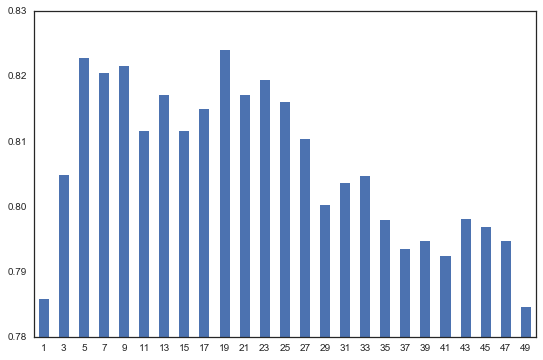

In [49]:
%matplotlib inline


def plot_dict(dictionary):
    pd.Series(dictionary).plot.bar(figsize=(9,6),
                                   ylim=(0.78,0.83),rot=0)
    plt.show()

knn_scores = dict()

for k in range(1,50,2):
    knn = KNeighborsClassifier(n_neighbors=k)
    scores = cross_val_score(knn,all_X,all_y,cv=10)
    accuracy_knn = np.mean(scores)
    knn_scores[k] = accuracy_knn
    
plot_dict(knn_scores)

we can see that a k value of 19 gave us our best score

The technique we just used is called grid search - we train a number of models across a 'grid' of values and then searched for the model that gave us the highest accuracy.

By creating a dictionary of parameters and possible values and passing it to the GridSearchCV object you can automate the process.



In [51]:
from sklearn.model_selection import GridSearchCV

knn = KNeighborsClassifier()

hyperparameters = {
    "n_neighbors": range(1,50,2)
}
grid = GridSearchCV(knn, param_grid=hyperparameters, cv=10)
grid.fit(all_X, all_y)

print(grid.best_params_)
print(grid.best_score_)

{'n_neighbors': 19}
0.82379349046


We will use GridSearchCV to turbo-charge our search for the best performing parameters for our model, by testing 40 combinations of three different hyperparameters.

In [52]:
from sklearn.model_selection import GridSearchCV

hyperparameters = {
    "n_neighbors": range(1,20,2),
    "weights": ["distance", "uniform"],
    "algorithm": ['brute'],
    "p": [1,2]
}

knn = KNeighborsClassifier()

grid = GridSearchCV(knn,param_grid=hyperparameters,cv=10)
grid.fit(all_X,all_y)

best_params = grid.best_params_
best_score = grid.best_score_

print(best_params)
print(best_score)

{'algorithm': 'brute', 'n_neighbors': 5, 'p': 1, 'weights': 'uniform'}
0.828282828283


We can use the GridSearchCV.best_estimator_ attribute to retrieve a trained model with the best-performing hyperparameters. 



In [54]:
holdout_no_id = holdout2.drop(['PassengerId'],axis=1)

best_knn = grid.best_estimator_     #best_knn = KNeighborsClassifier(p=1,algorithm='brute',n_neighbors=5,weights='uniform') best_knn.fit(all_X,all_y)
                     
holdout_predictions = best_knn.predict(holdout_no_id)


holdout_ids = holdout2["PassengerId"]
submission_df = {"PassengerId": holdout_ids,
                 "Survived": holdout_predictions}
submission = pd.DataFrame(submission_df)

submission.to_csv("submission_3.csv",index=False)

It scores 75.6%, less than our best submission of 78.0%.



We try another algorithm called random forests. Random forests is a specific type of decision tree algorithm.



In [55]:
from sklearn.ensemble import RandomForestClassifier

clf = RandomForestClassifier(random_state=1)

scores = cross_val_score(clf,all_X,all_y,cv=10)

accuracy_rf = np.mean(scores)

print(scores)
print(accuracy_rf)

[ 0.85555556  0.75555556  0.71910112  0.85393258  0.83146067  0.80898876
  0.80898876  0.74157303  0.84269663  0.85227273]
0.807012541142


we can use GridSearchCV to test a variety of hyperparameters to find the best performing model.



In [56]:
hyperparameters = {
        "max_depth": [5,10],
        "criterion": ["entropy", "gini"],
        "max_features": ['log2',"sqrt"],
        "min_samples_leaf": [1,5],
        "min_samples_split": [3,5],
        "n_estimators": [6,9]
}



clf = RandomForestClassifier(random_state=1)

grid = GridSearchCV(clf,param_grid=hyperparameters,cv=10)
grid.fit(all_X,all_y)

best_params = grid.best_params_
best_score = grid.best_score_

print(best_params)
print(best_score)

{'criterion': 'entropy', 'max_depth': 10, 'max_features': 'log2', 'min_samples_leaf': 1, 'min_samples_split': 5, 'n_estimators': 9}
0.842873176207


The cross-validation score for the best performing model was 84.3%, making it the best cross-validation score we've obtained

train it on the holdout data and create a submission file

In [57]:
best_rf = grid.best_estimator_
holdout_predictions = best_rf.predict(holdout_no_id)

holdout_ids = holdout2["PassengerId"]
submission_df = {"PassengerId": holdout_ids,
                 "Survived": holdout_predictions}
submission = pd.DataFrame(submission_df)

submission.to_csv("submission_4.csv",index=False)

Our submission has 0.775 accuracy score